### Importando pacotes e base de dados:

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


# Desafio - Dia 01:

**1**: Proporção dos inscritos por idade.

**2**: Descobrir de quais estados são os inscritos com 13 anos.

**3**: Adicionar título no gráfico.

**4**: Plotar os histogramas das idades do treineiro e não treineiros.

**5**: Comparar as distribuições das provas em inglês e espanhol.

**6**: Explorar a documentação e visualizações com matplotlib ou pandas e gerar novas visualizações.

### 1 - Proporção dos inscritos por idade:

In [3]:
idade_normalizada = dados['NU_IDADE'].value_counts(normalize=True).sort_index()*100
idade_normalizada = pd.DataFrame({'Proporção (%)': idade_normalizada})
idade_normalizada.rename_axis('Idade', inplace=True)
idade_normalizada

,Proporção (%)
Idade,
13,0.003140
14,0.110692
15,1.577171
16,6.146962
17,16.687078
...,...
73,0.001570
75,0.001570
76,0.000785


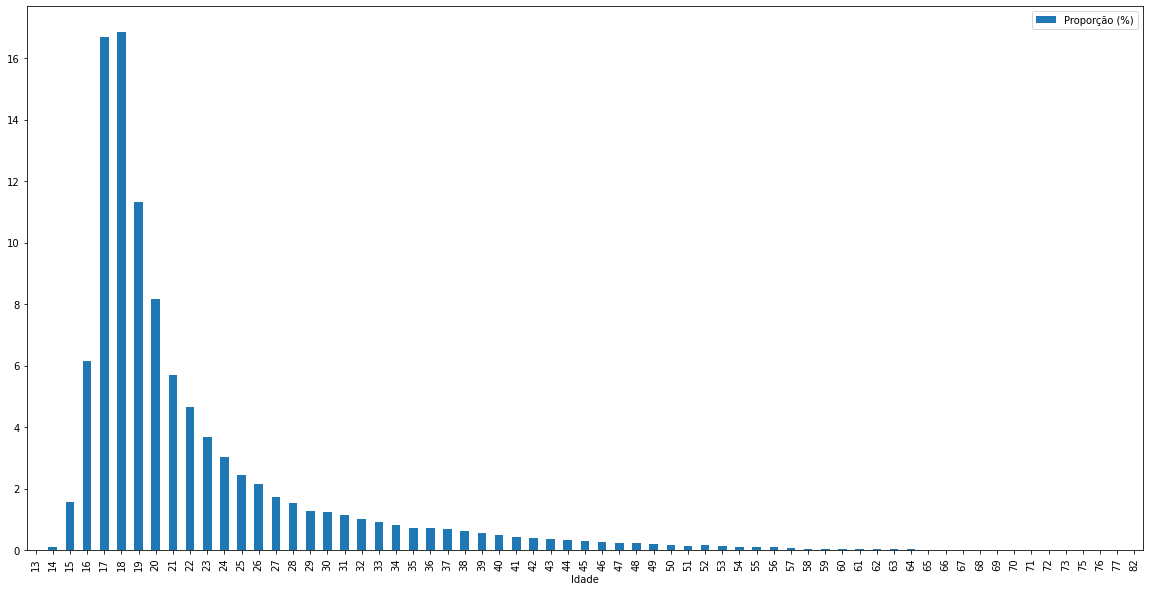

In [4]:
idade_normalizada.plot.bar(y='Proporção (%)', figsize=(20,10))

In [5]:
idade_normalizada.loc[17][0].round(2)

16.69

In [6]:
idade_normalizada.loc[18][0].round(2)

16.84

In [7]:
idade_normalizada.loc[19][0].round(2)

11.32

In [8]:
grupo_181719 = (idade_normalizada.loc[17][0]+idade_normalizada.loc[18][0]+idade_normalizada.loc[19][0]).round(2)
grupo_181719

44.85

Os candidatos com 18, 17 e 19 anos representam, respectivamente, 16,84%, 16,68% e 11,31% da amostra selecionada. Esse grupo representa em conjunto 44,85% da amostra.

### 2 - Descobrir de quais estados são os inscritos com 13 anos:

In [9]:
dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"]

57359     SP
95630     MT
98197     AP
116501    BA
Name: SG_UF_RESIDENCIA, dtype: object

Os inscritos com 13 anos nessa amostra são de Amapá, Bahia, Mato Grosso e São Paulo.

### 3 - Adicionar título aos gráficos:

Text(0.5, 1.0, 'Frequência da Idade dos candidatos da amostra')

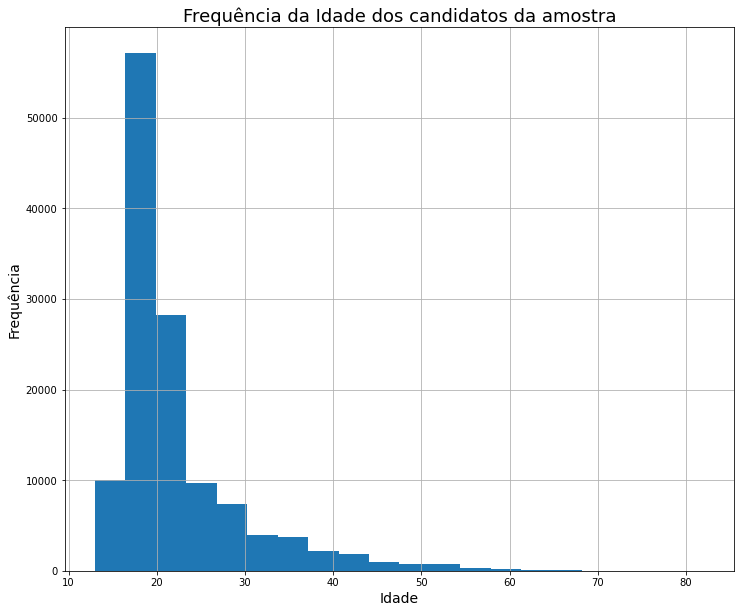

In [10]:
dados["NU_IDADE"].hist(bins=20, figsize=(12,10))
plt.xlabel('Idade', fontdict={'fontsize':14})
plt.ylabel('Frequência', fontdict={'fontsize':14})
plt.title('Frequência da Idade dos candidatos da amostra', fontdict={'fontsize':18})

Text(0.5, 1.0, 'Distribuição das notas dos candidatos da amostra')

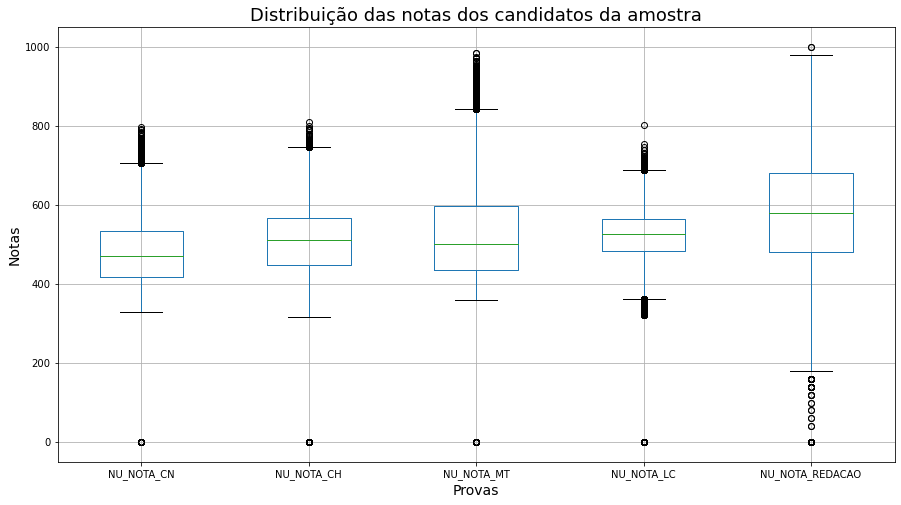

In [11]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados[provas].plot.box(grid=True, figsize=(15,8)) 
plt.xlabel('Provas', fontdict={'fontsize':14})
plt.ylabel('Notas', fontdict={'fontsize':14})
plt.title('Distribuição das notas dos candidatos da amostra', fontdict={'fontsize':18})

Text(0.5, 1.0, 'Proporção das notas dos candidatos da amostra conforme idade')

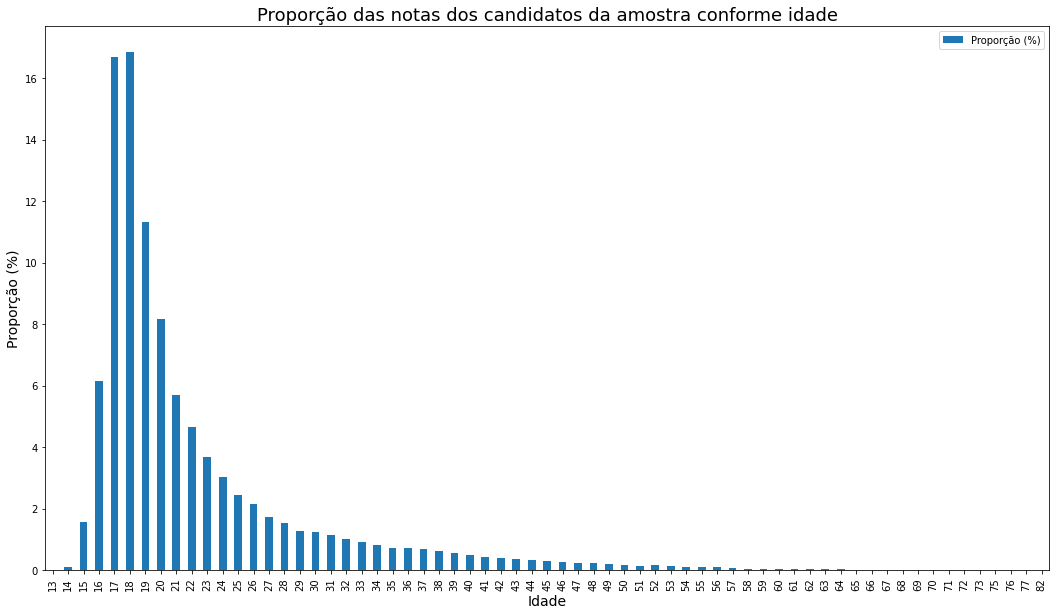

In [12]:
idade_normalizada.plot.bar(y='Proporção (%)', figsize=(18,10))
plt.xlabel('Idade', fontdict={'fontsize':14})
plt.ylabel('Proporção (%)', fontdict={'fontsize':14})
plt.title('Proporção das notas dos candidatos da amostra conforme idade', fontdict={'fontsize':18})

### 4 - Plotar os histogramas das idades do treineiro e não treineiros:

In [13]:
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

Text(0.5, 1.0, 'Frequência da Idade dos candidatos da amostra - Treineiros')

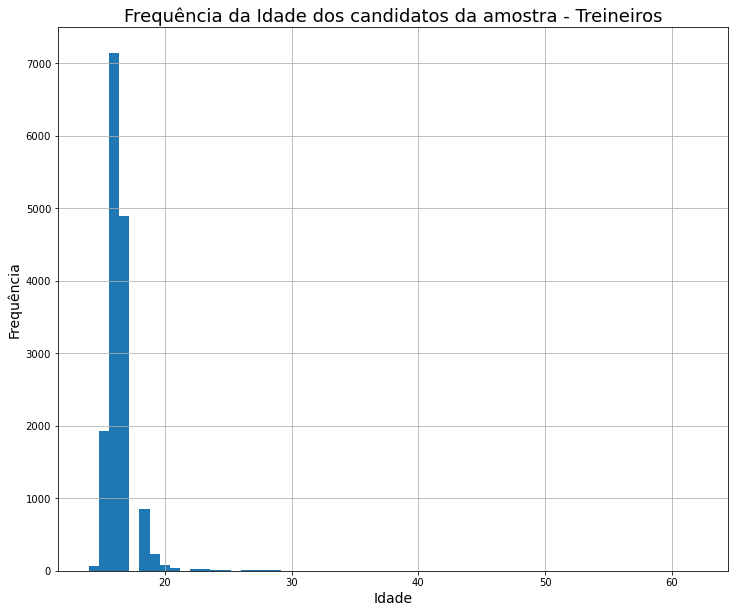

In [14]:
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].hist(bins=60, figsize=(12,10))
plt.xlabel('Idade', fontdict={'fontsize':14})
plt.ylabel('Frequência', fontdict={'fontsize':14})
plt.title('Frequência da Idade dos candidatos da amostra - Treineiros', fontdict={'fontsize':18})

In [15]:
dados.query("IN_TREINEIRO == 0")["NU_IDADE"].value_counts().sort_index()

13        4
14       77
15       82
16      688
17    16355
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

Text(0.5, 1.0, 'Frequência da Idade dos candidatos da amostra - Não Treineiros')

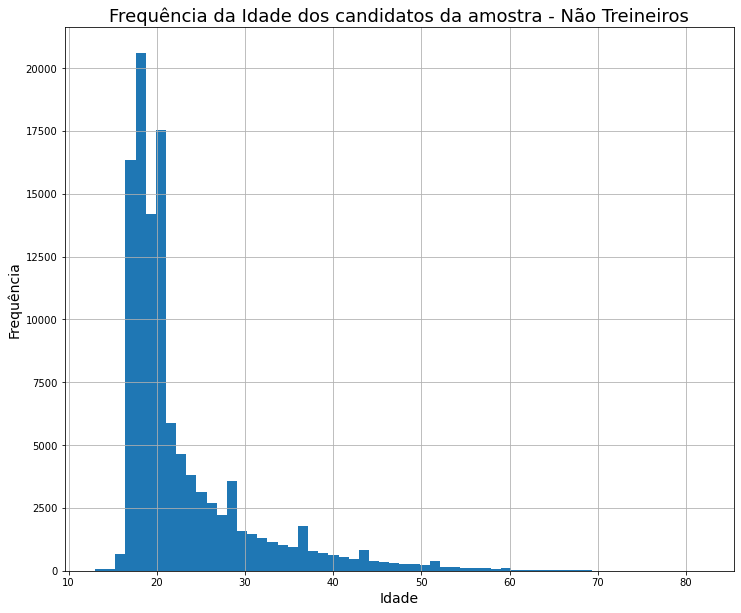

In [16]:
dados.query("IN_TREINEIRO == 0")["NU_IDADE"].hist(bins=60, figsize=(12,10))
plt.xlabel('Idade', fontdict={'fontsize':14})
plt.ylabel('Frequência', fontdict={'fontsize':14})
plt.title('Frequência da Idade dos candidatos da amostra - Não Treineiros', fontdict={'fontsize':18})

As idades dos candidatos treineiros mais frequentes nessa amostra estão entre 15 e 17 anos. Quanto à candidatos não treineiros, as idades mais frequentes nessa amostra estão entre 17 e 21 anos.

### 5 - Comparar as distribuições das provas em inglês e espanhol:

Text(0.5, 1.0, 'Distribuição das notas dos candidatos que escolheram fazer a prova de inglês')

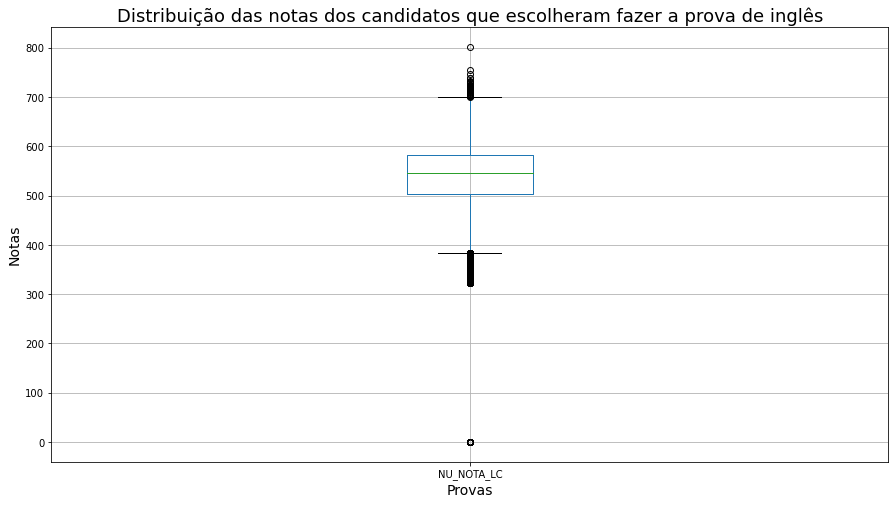

In [17]:
dados.query("TP_LINGUA == 0")['NU_NOTA_LC'].plot.box(grid=True, figsize=(15,8))

plt.xlabel('Provas', fontdict={'fontsize':14})
plt.ylabel('Notas', fontdict={'fontsize':14})
plt.title('Distribuição das notas dos candidatos que escolheram fazer a prova de inglês', fontdict={'fontsize':18})

Text(0.5, 1.0, 'Distribuição das notas dos candidatos que escolheram fazer a prova de espanhol')

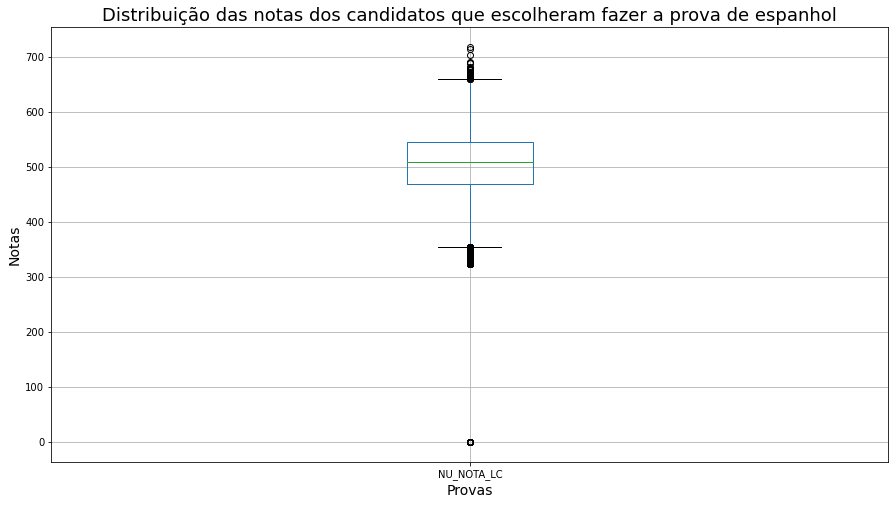

In [18]:
dados.query("TP_LINGUA == 1")['NU_NOTA_LC'].plot.box(grid=True, figsize=(15,8))

plt.xlabel('Provas', fontdict={'fontsize':14})
plt.ylabel('Notas', fontdict={'fontsize':14})
plt.title('Distribuição das notas dos candidatos que escolheram fazer a prova de espanhol', fontdict={'fontsize':18})

Segundo os gráficos que mostram as distribuições das notas, os candidatos que escolheram a prova de inglês acertaram mais questões do que os alunos que escolheram a prova de espanhol.

# Desafio - Dia 02:

**MEGA DESAFIO**: Pegar a amostra completa dos alunos de 13 e 14 anos e verificar os estados.

**1**: Aumentar a amostra para alunos menores de idade e comparar proporção por estados.

**2**: Criando uma função que plota boxplot.

**3**: Verificar se quem zerou a prova foi eliminado ou não estava presente.

**4**: Quem é eliminado tira zero ou será NaN?

**5**: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

**6**: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto da pandemia.

### 1 - Aumentar a amostra para alunos menores de idade e comparar proporção por estados:

In [27]:
alunos_menores = dados.query("NU_IDADE < 18")
alunos_menores["SG_UF_RESIDENCIA"].value_counts(normalize=True)*100

SP    23.434699
MG    10.070423
BA     6.379641
CE     6.251601
PE     5.777849
PR     5.646607
RJ     5.284891
PA     4.058899
GO     3.838028
MA     3.725992
RS     3.169014
PB     2.682458
SC     2.544814
PI     2.170294
MT     1.959027
ES     1.654930
DF     1.510883
AL     1.427657
RN     1.373239
AM     1.370038
MS     1.347631
SE     1.296415
TO     1.101152
RO     0.749040
AP     0.601793
AC     0.348912
RR     0.224072
Name: SG_UF_RESIDENCIA, dtype: float64

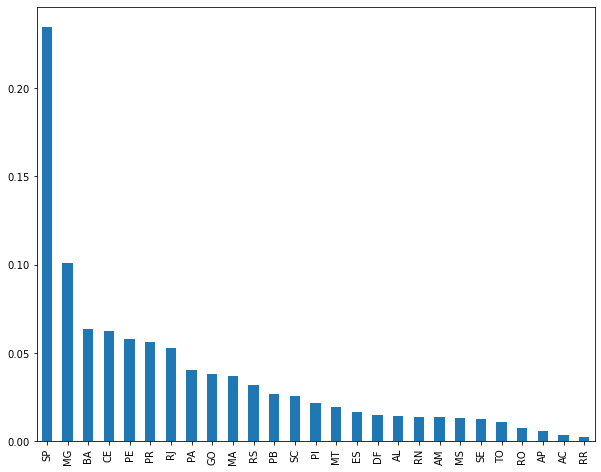

In [26]:
alunos_menores["SG_UF_RESIDENCIA"].value_counts(normalize=True).plot.bar(figsize=(10,8))

Os três estados com maior número de candidatos menores de idade, isto é, com idade menor que 18 anos, são São Paulo, Minas Gerais, Bahia que correspondem respectivamente a 23,43%, 10,07%, 6,37%. Os estados com menor número de candidatos menores de idade na amostra são Amapá, Acre e Roraima são 0,60%, 0,34% e 0,22%, respectivamente.

### 2 - Criando uma função que plota boxplot:

In [117]:
renda_ordenada = dados["Q006"].unique() # Criando uma lista com faixas de renda ordenadas para serem incluídas na função.
renda_ordenada.sort()
renda_ordenada

def boxplot(x, y, data, order):
    plt.figure(figsize=(12,8))
    sns.boxplot(x=x, y=y, data=data, order=order)

In [39]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados[provas].sum(axis=1) # Somando a nota das provas para cada candidato (cada linha).
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1) # Incluindo a coluna de soma das notas na base.

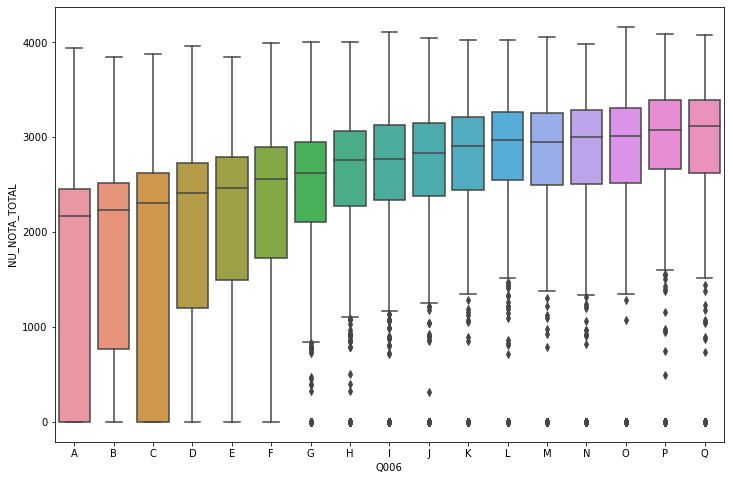

In [118]:
boxplot(x='Q006', y='NU_NOTA_TOTAL', data=dados, order=renda_ordenada) # Testando a função.

Duas coisas são importantes de se notar no gráfico da distribuição das notas conforme a renda. A primeira é que as notas aumentam conforme a renda aumenta, isto é, a desigualdade de renda no presente pode gerar desigualdade de renda no futuro se considerarmos que as pessoas mais bem colocadas têm mais chances de serem selecionadas para as universidades e se uma boa formação no presente gera uma renda elevada no futuro. A segunda informação importante que pode ser extraída desse gráfico é que o valor 0 está entre os 25% e 75% valores mais frequentes da soma total das notas paras as classes A e C. É necessário investigar o que está acontecendo nessas faixas de renda. 

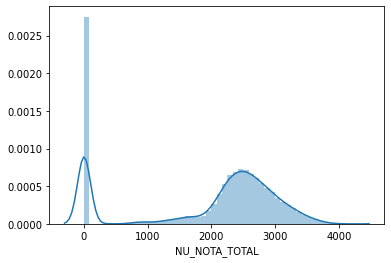

In [43]:
sns.distplot(dados['NU_NOTA_TOTAL'])

In [45]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
provas.append("NU_NOTA_TOTAL") # incluindo a nota total na lista de notas de provas.
dados[provas].query("NU_NOTA_TOTAL == 0")

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


In [46]:
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_notas_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


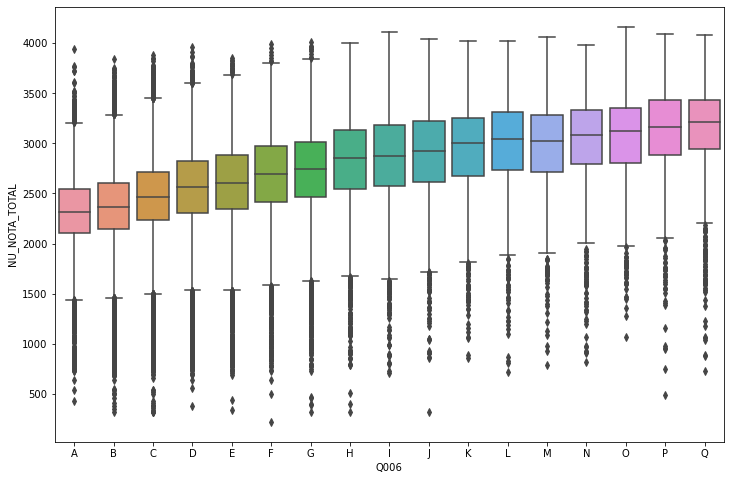

In [119]:
boxplot(x='Q006', y='NU_NOTA_TOTAL', data=dados_sem_notas_zero, order=renda_ordenada)

Sem os dados de quem zerou todas as provas, as distribuições das notas totais das classes mais baixas subiram. No entanto, o padrão visualizado no gráfico anterior permanece: quanto mais baixa a renda de um candidato, menor é sua nota. 

### 3 - Verificar se quem zerou a prova foi eliminado ou não estava presente:

In [42]:
dados_com_zero = dados.query("NU_NOTA_TOTAL == 0")
dados_com_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
10,190001005028,2019,1506807,Santarém,15,PA,28,F,2,3,...,A,A,B,B,A,B,A,A,A,0.0
11,190001005057,2019,1501709,Bragança,15,PA,36,F,1,3,...,A,A,B,B,A,B,A,A,B,0.0
26,190001005484,2019,1504208,Marabá,15,PA,26,M,2,3,...,A,A,B,A,A,C,A,B,B,0.0
38,190001006086,2019,1508126,Ulianópolis,15,PA,29,F,1,3,...,A,A,B,B,A,C,A,A,B,0.0
40,190001006292,2019,1504422,Marituba,15,PA,24,M,1,1,...,A,A,B,A,A,D,A,A,B,0.0


In [58]:
dados_com_zero['TP_PRESENCA_CN'].value_counts(normalize=True)

0    0.999829
1    0.000171
Name: TP_PRESENCA_CN, dtype: float64

In [69]:
dados_com_zero['TP_PRESENCA_CH'].value_counts(normalize=True)

0    0.994479
2    0.004115
1    0.001406
Name: TP_PRESENCA_CH, dtype: float64

In [70]:
dados_com_zero['TP_PRESENCA_LC'].value_counts(normalize=True)

0    0.994479
2    0.004115
1    0.001406
Name: TP_PRESENCA_LC, dtype: float64

In [71]:
dados_com_zero['TP_PRESENCA_MT'].value_counts(normalize=True)

0    0.999829
1    0.000171
Name: TP_PRESENCA_MT, dtype: float64

Dentre os alunos cuja soma total das notas foi 0, 99,9% realmente não compareceram as provas de 'Ciências da Natureza e suas Tecnologias' e 'Matemática e suas Tecnologias', 99,4% nas provas de 'Ciências Humanas e suas Tecnologias' e 'Linguagens, Códigos e suas Tecnologias'. 0,4% foram eliminados nas provas de 'Ciências Humanas e suas Tecnologias' e 'Linguagens, Códigos e suas Tecnologias' e 0,1% estavam presentes na quatro provas.

### 4 - Quem é eliminado tira zero ou NaN?

In [82]:
dados_com_zero.query('TP_PRESENCA_CH == 2')[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
77,NaN,NaN,NaN,NaN,NaN,0.0
396,NaN,NaN,NaN,NaN,NaN,0.0
446,NaN,NaN,NaN,NaN,NaN,0.0
609,NaN,NaN,NaN,NaN,NaN,0.0
728,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
124695,NaN,NaN,NaN,NaN,NaN,0.0
125216,NaN,NaN,NaN,NaN,NaN,0.0
125784,NaN,NaN,NaN,NaN,NaN,0.0
126769,NaN,NaN,NaN,NaN,NaN,0.0


In [84]:
dados_com_zero.query('TP_PRESENCA_LC == 2')[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
77,NaN,NaN,NaN,NaN,NaN,0.0
396,NaN,NaN,NaN,NaN,NaN,0.0
446,NaN,NaN,NaN,NaN,NaN,0.0
609,NaN,NaN,NaN,NaN,NaN,0.0
728,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
124695,NaN,NaN,NaN,NaN,NaN,0.0
125216,NaN,NaN,NaN,NaN,NaN,0.0
125784,NaN,NaN,NaN,NaN,NaN,0.0
126769,NaN,NaN,NaN,NaN,NaN,0.0


As notas dos eliminados são NaN.

### 5 - Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

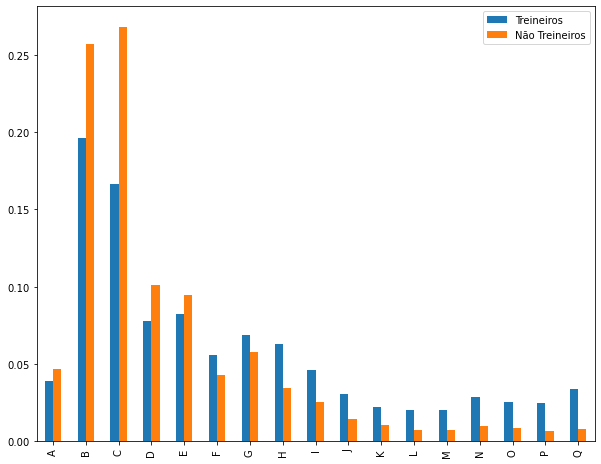

In [112]:
dados_treineiro = dados.query("IN_TREINEIRO ==1")['Q006'].value_counts(normalize=True)
dados_nao_treineiro = dados.query("IN_TREINEIRO ==0")['Q006'].value_counts(normalize=True)

treineiros_df = pd.DataFrame({'Treineiros': dados_treineiro,
                              'Não Treineiros': dados_nao_treineiro})

treineiros_df.plot.bar(figsize=(10,8))

O gráfico acima indica que o número de candidatos não treineiros é maior nas classes sociais A, B, C, D e E (renda familiar abaixo de 2.495,00 reais). Entre as classes F, G, H, I, J, K, L, M, N, O, P, Q (renda familiar acima de 2.495,00 reais), há um número maior de candidatos treineiros. Como o exame para treineiros é pago, esse resultado pode estar ligado ao nível de renda familiar: se a renda é alta, a família detêm mais recursos que podem ser investidos em educação, especificamente no caso desse gráfico, os pais podem pagar para filhos que não estão no 3º ano do Ensino Médio fazerem a prova.

### 6 - Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto da pandemia.

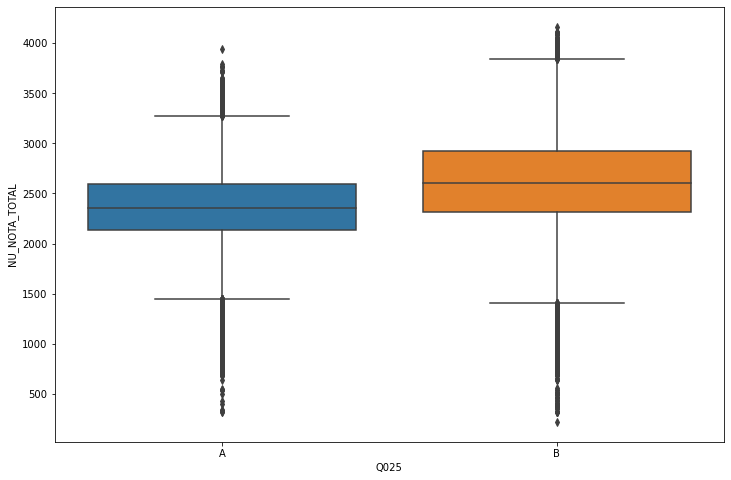

In [121]:
internet_ordenada = dados["Q025"].unique() # Criando uma lista com faixas de renda ordenadas para serem incluídas na função.
internet_ordenada.sort()
internet_ordenada

boxplot(x='Q025', y='NU_NOTA_TOTAL', data=dados_sem_notas_zero, order=internet_ordenada)

Segundo o resultado do gráfico que apresenta a distribuição das notas dos candidatos, as notas daqueles que têm acesso a internet são maiores do que os que não têm. Apesar dos dados serem do ENEM 2019, eles retratam uma questão importante para a aplicação nesse ano. Por conta da COVID-19, as aulas presenciais foram canceladas e adotou-se um estilo de estudo home office. No entanto, nem todos os alunos têm acesso a internet de qualidade que permita estudar dessa forma. Geralmente, esses alunos são de classes de renda mais baixas. Com isso, na aplicação desse ano pode ser que haja um reforço da desigualdade: pessoas com baixa renda têm internet de baixa qualidade, por conta disso se preparam mal para as provas e tiram notas menores comparado aos candidatos com renda familiar maior. Com notas menores, acabam entrando em faculdades piores ou nem entrando na graduação. Se considerarmos que o acesso ao terceiro grau de ensino é um fator que interfere na renda futura pode ser que a renda familiar desses candidatos que hoje tem renda baixa continue sendo baixa daqui a alguns anos.